In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns
df = sns.load_dataset("titanic")
df = df[['age', 'sibsp',	'parch', 'fare', 'survived']]
df['age'].fillna(df['age'].mean(), inplace=True)
print(df.isnull().sum())
df.head()

age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64


,age,sibsp,parch,fare,survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


In [3]:
# Select the variables for clustering
variables = df[['age', 'sibsp', 'parch', 'fare']]

In [4]:
# Standardize the variables (important for K-means)
scaler = StandardScaler()
variables_scaled = scaler.fit_transform(variables)
variables_scaled

array([[-0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [ 0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.17706291, -0.4745452 , -0.47367361, -0.49237783]])

In [5]:
# Choose the number of clusters (k)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to the data
kmeans.fit(variables_scaled)

# Add cluster labels to the original DataFrame
df['kmeans_Cluster'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,sibsp,parch,fare,survived,kmeans_Cluster
0,22.0,1,0,7.2500,0,1
1,38.0,1,0,71.2833,1,1
2,26.0,0,0,7.9250,1,1
3,35.0,1,0,53.1000,1,1
4,35.0,0,0,8.0500,0,1


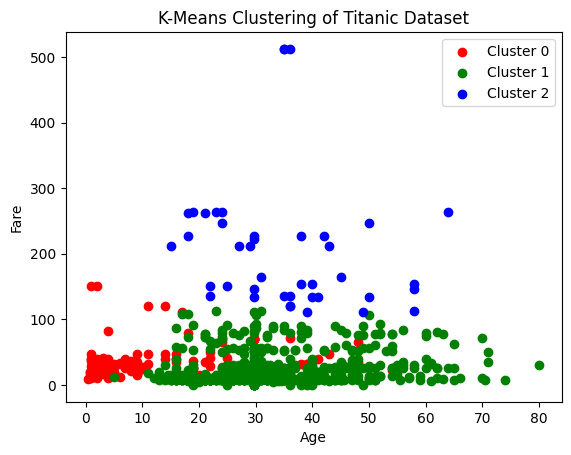

In [6]:
# Define colors for the clusters
colors = ['r', 'g', 'b']  # You can choose colors as needed

# Create separate scatter plots for each cluster
for cluster_id in range(3):
    cluster_data = df[df['kmeans_Cluster'] == cluster_id]
    plt.scatter(cluster_data['age'], cluster_data['fare'], c=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Means Clustering of Titanic Dataset')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [7]:
# Calculate the means for each cluster and 'survived' label
cluster_means = df.groupby(['kmeans_Cluster', 'survived']).mean().reset_index()

# Pivot the data to create a table with 'survived' as the index
cluster_table = cluster_means.pivot_table(index='survived', columns='kmeans_Cluster', values=['age', 'fare'])

# Rename the columns for clarity
cluster_table.columns = [f'Cluster_{col[1]}_{col[0]}' for col in cluster_table.columns]

# Display the cluster means table
print(cluster_table)


          Cluster_0_age  Cluster_1_age  Cluster_2_age  Cluster_0_fare  \
survived                                                                
0             19.101257      31.971225      35.036203       34.661054   
1             12.680462      31.774124      35.113275       33.436770   

          Cluster_1_fare  Cluster_2_fare  
survived                                  
0              16.315518      190.829918  
1              32.342037      213.051527  


In [8]:
df.describe()

,age,sibsp,parch,fare,survived,kmeans_Cluster
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838,0.897868
std,13.002015,1.102743,0.806057,49.693429,0.486592,0.428881
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


### **Hierarchical Clustering** ###

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

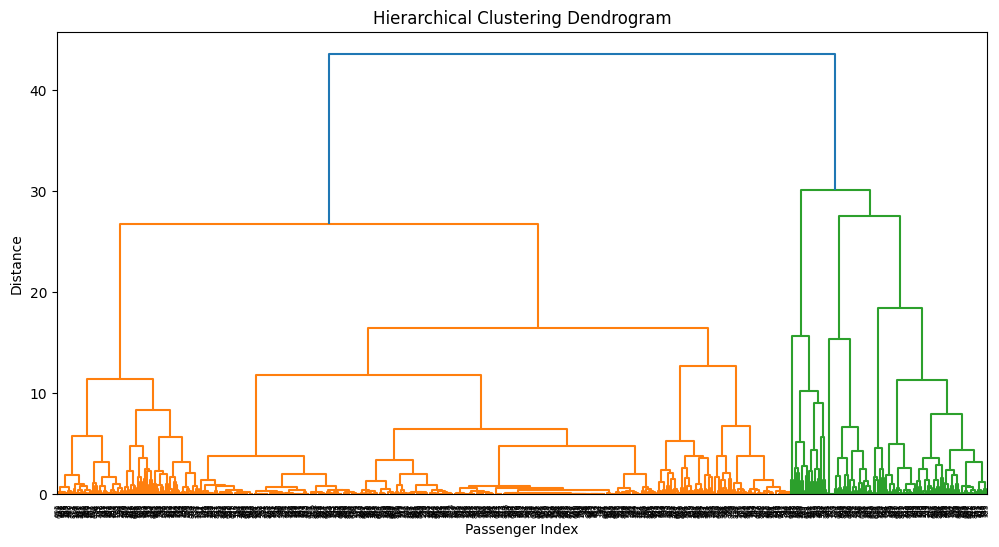

In [10]:
# Perform hierarchical clustering using linkage
linkage_matrix = linkage(variables_scaled, method='ward', metric='euclidean')

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the dendrogram
dendrogram(linkage_matrix, labels=df.index, orientation='top', distance_sort='ascending', show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Passenger Index')
plt.ylabel('Distance')
plt.show()

In [11]:
# You can adjust the threshold as needed
optimal_clusters = fcluster(linkage_matrix, t=20, criterion='distance')

# Add the cluster labels to the DataFrame
df['hierarchical_Cluster'] = optimal_clusters

df.head()

,age,sibsp,parch,fare,survived,kmeans_Cluster,hierarchical_Cluster
0,22.0,1,0,7.2500,0,1,2
1,38.0,1,0,71.2833,1,1,1
2,26.0,0,0,7.9250,1,1,2
3,35.0,1,0,53.1000,1,1,1
4,35.0,0,0,8.0500,0,1,2


In [12]:
df.describe()

,age,sibsp,parch,fare,survived,kmeans_Cluster,hierarchical_Cluster
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838,0.897868,2.351291
std,13.002015,1.102743,0.806057,49.693429,0.486592,0.428881,1.170348
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,2.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,2.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,5.000000


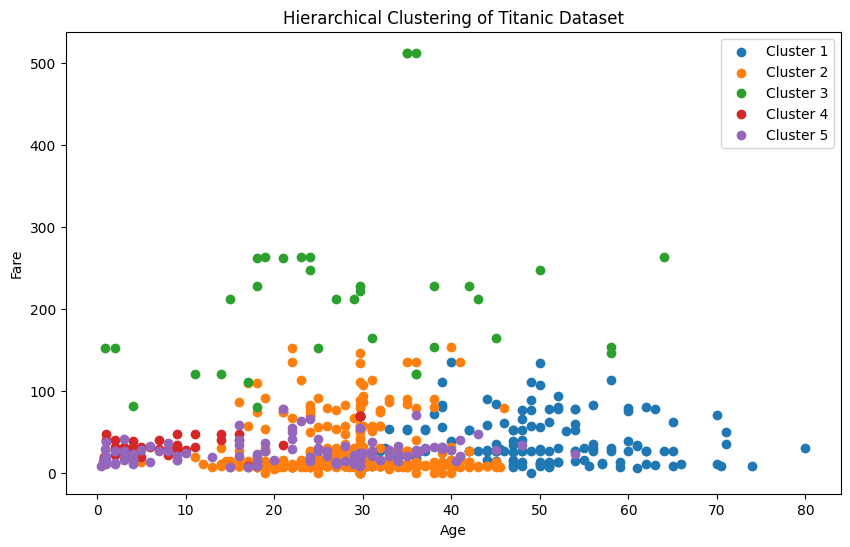

In [13]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_id in np.unique(optimal_clusters):
    cluster_data = df[df['hierarchical_Cluster'] == cluster_id]
    plt.scatter(cluster_data['age'], cluster_data['fare'], label=f'Cluster {cluster_id}')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Hierarchical Clustering of Titanic Dataset')
plt.legend()
plt.show()

## DBSCAN Clustering ##

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
cluster_labels = dbscan.fit_predict(variables_scaled)

# Add the cluster labels to the DataFrame
df['dbscan_Cluster'] = cluster_labels
df.head()

,age,sibsp,parch,fare,survived,kmeans_Cluster,hierarchical_Cluster,dbscan_Cluster
0,22.0,1,0,7.2500,0,1,2,0
1,38.0,1,0,71.2833,1,1,1,0
2,26.0,0,0,7.9250,1,1,2,1
3,35.0,1,0,53.1000,1,1,1,0
4,35.0,0,0,8.0500,0,1,2,1


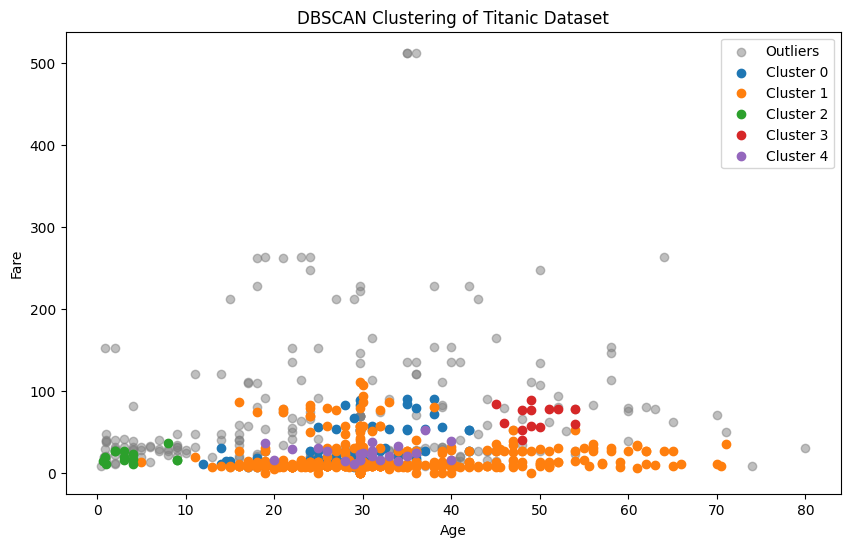

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_id in np.unique(cluster_labels):
    if cluster_id == -1:
        # Cluster label -1 represents outliers
        cluster_data = df[df['dbscan_Cluster'] == cluster_id]
        plt.scatter(cluster_data['age'], cluster_data['fare'], label=f'Outliers', color='gray', alpha=0.5)
    else:
        cluster_data = df[df['dbscan_Cluster'] == cluster_id]
        plt.scatter(cluster_data['age'], cluster_data['fare'], label=f'Cluster {cluster_id}')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('DBSCAN Clustering of Titanic Dataset')
plt.legend()
plt.show()


# **Evaluation** #

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

Interpretation of the cluster evaluation metrics:

1. **Silhouette Score:** The Silhouette Score ranges from -1 to 1. Higher values indicate that the clusters are well-separated, with data points within clusters being closer to each other than to data points in other clusters. A score close to 1 suggests that the clustering is excellent, while a score close to -1 suggests that data points may be assigned to the wrong clusters. Therefore, higher Silhouette Scores are better.

2. **Calinski-Harabasz Index:** The Calinski-Harabasz Index is also known as the Variance Ratio Criterion. It measures the ratio of between-cluster variance to within-cluster variance.

- Higher values indicate better-defined clusters, where the data points are more spread out between clusters and tightly packed within clusters. So, higher Calinski-Harabasz scores are better.

- Range: The Calinski-Harabasz Index does not have a fixed range. It's an unbounded score.


3. **Davies-Bouldin Score:** The Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster. A lower Davies-Bouldin score indicates better separation between clusters.

- In other words, clusters with well-defined boundaries will have lower scores. So, lower Davies-Bouldin scores are better.

- Range: The Davies-Bouldin Score has a range from 0 to positive infinity.

These metrics help assess the quality of the clustering results, but the specific interpretation may vary based on the dataset and the problem context.

In [19]:
# Calculate silhouette score (higher is better)
kmeans_silhouette = silhouette_score(df[['age', 'sibsp', 'parch', 'fare']], df['kmeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette:.3f}')

# Calculate Calinski-Harabasz index (higher is better)
kmeans_calinski_harabasz = calinski_harabasz_score(df[['age', 'sibsp', 'parch', 'fare']], df['kmeans_Cluster'])
print(f'K-Means Calinski-Harabasz Index: {kmeans_calinski_harabasz:.3f}')

# Calculate Davies-Bouldin score (lower is better)
kmeans_davies_bouldin = davies_bouldin_score(df[['age', 'sibsp', 'parch', 'fare']], df['kmeans_Cluster'])
print(f'K-Means Davies-Bouldin Score: {kmeans_davies_bouldin:.3f}')

K-Means Silhouette Score: 0.244
K-Means Calinski-Harabasz Index: 611.114
K-Means Davies-Bouldin Score: 1.596


In [20]:
# hierarchical clustering

# Calculate silhouette score
hierarchical_silhouette = silhouette_score(df[['age', 'sibsp', 'parch', 'fare']], df['hierarchical_Cluster'])
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette:.3f}')

# Calculate Calinski-Harabasz index
hierarchical_calinski_harabasz = calinski_harabasz_score(df[['age', 'sibsp', 'parch', 'fare']], df['hierarchical_Cluster'])
print(f'Hierarchical Calinski-Harabasz Index: {hierarchical_calinski_harabasz:.3f}')

# Calculate Davies-Bouldin score
hierarchical_davies_bouldin = davies_bouldin_score(df[['age', 'sibsp', 'parch', 'fare']], df['hierarchical_Cluster'])
print(f'Hierarchical Davies-Bouldin Score: {hierarchical_davies_bouldin:.3f}')

Hierarchical Silhouette Score: 0.113
Hierarchical Calinski-Harabasz Index: 309.880
Hierarchical Davies-Bouldin Score: 2.452


In [23]:
# Print the number of clusters identified by DBSCAN (excluding outliers)

# Calculate silhouette score
dbscan_silhouette = silhouette_score(df[['age', 'sibsp', 'parch', 'fare']], df['dbscan_Cluster'])
print(f'Dbscan Silhouette Score: {dbscan_silhouette:.3f}')

db_clusters = len(np.unique(df['dbscan_Cluster'])) - 1
print(f'Number of Clusters (DBSCAN): {db_clusters}')

# Print the number of outliers (cluster -1)
outliers = len(df[df['dbscan_Cluster'] == -1])
print(f'Number of Outliers (DBSCAN): {outliers}')

Dbscan Silhouette Score: -0.161
Number of Clusters (DBSCAN): 5
Number of Outliers (DBSCAN): 232
